# Yield review plot

The goal of this notebook is to combine the yield plots from as much existing literature as possible. 
I will try to describe the data a bit as well here while loading in the sets

In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import json
from matplotlib.gridspec import GridSpec

home_dir        = os.path.expanduser("~") 
yield_data_dir  =  '../YieldReview/'


######################################
## PLOT setttings
plt.rcParams['font.family'] = 'serif'
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,19,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=SMALL_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.rcParams['axes.unicode_minus'] = True

plt.rcParams['text.usetex'] = False

# Change RBG color to normalized color for plt
def normalized_color(rgb_color): 
    return tuple([x/255 for x in rgb_color[:3]])



### extract data from WebPlotDigitizer data

In [2]:
# Extract data from WebPlotDigitizer json file
def extract_WebPlotDigitizer_data(loc = yield_data_dir, filename = 'Giacobbo_Mapelli2018.json'):
    # open json file
    with open(loc + filename, 'r') as f:
        json_data = json.load(f)

    # new list to store the data
    data_list = []

    # Loop over all items in json_data['datasetColl']
    for data in json_data['datasetColl']:
        # 'data' is a dict, most relevant keys are 'name', 'colorRGB' 'data'
        label = data['name']
        color = normalized_color(data['colorRGB']) # export to usable color

        xy_dict = data['data']
        # 'xy_dict' is a list of dicts, with 'x' and 'y' pointing to pixel values, and 'value' pointing to the actual values we want
        x_values, y_values = zip(*[item['value'] for item in xy_dict])

        # Append the data to the list as a dictionary
        data_list.append({'name': label, 'color': color, 'x_value': x_values, 'y_value': y_values})

    # Convert the list of dictionaries into a pandas DataFrame
    df = pd.DataFrame(data_list)

    return df



### Giacobbo & Mapelli 2018
run with MOBSE

Their [figure 14](https://arxiv.org/abs/1806.00001)



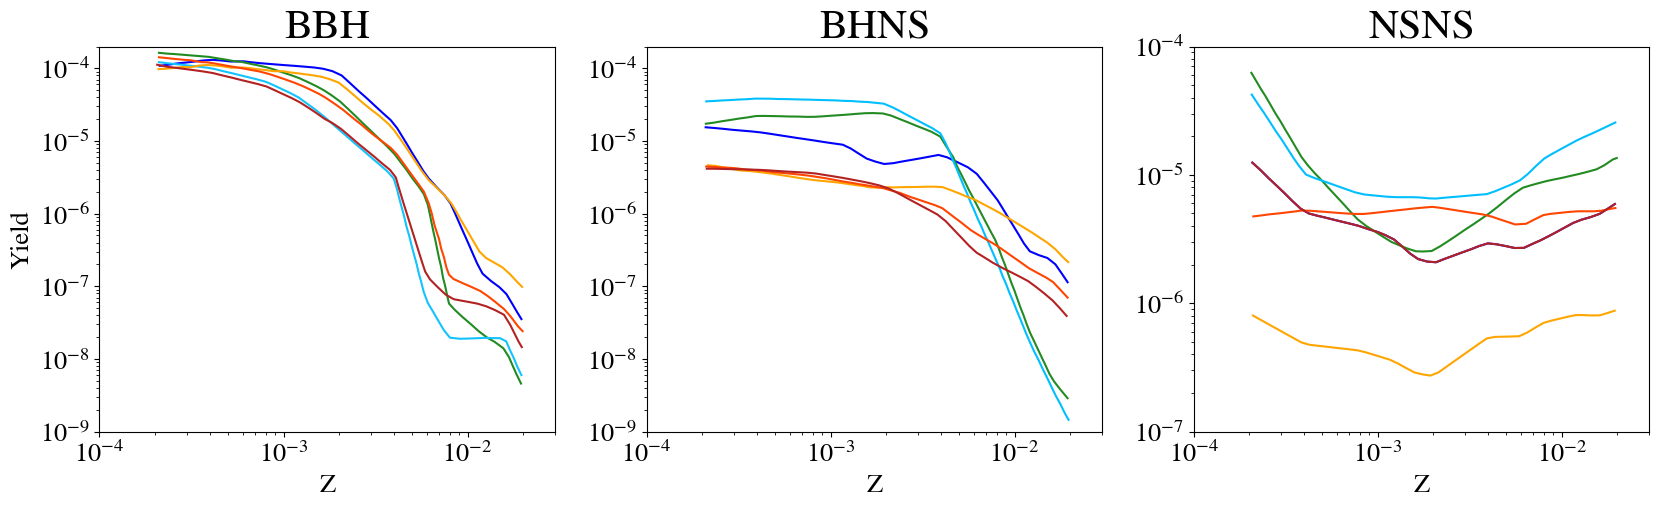

In [3]:
#####################
# Giacobbo & Mapelli 2018 

fig = plt.figure(figsize=(20, 5))

# Create a GridSpec with 1 row and 3 columns
gs = GridSpec(1, 3, figure=fig)

# Create 3 small subplots on a line
axes = [fig.add_subplot(gs[0, i]) for i in range(3)]

# List of panda tables of pot DCO progenitors
titles = ["BBH", "BHNS", "NSNS"]
Giacobbo_Mapelli2018 = extract_WebPlotDigitizer_data(loc = yield_data_dir+ '/2018_Giacobbo_Mapelli/', filename = 'Giacobbo_Mapelli2018.json')

# Extract the different types of DCOs
BBHs    = Giacobbo_Mapelli2018[Giacobbo_Mapelli2018['name'].str.contains('_BBH')].reset_index(drop=True)
BHNSs   = Giacobbo_Mapelli2018[Giacobbo_Mapelli2018['name'].str.contains('_BHNS')].reset_index(drop=True)
NSNSs   = Giacobbo_Mapelli2018[Giacobbo_Mapelli2018['name'].str.contains('_NSNS')].reset_index(drop=True)
dfs = [BBHs, BHNSs, NSNSs]

# Loop over the axes and dataframes
for ax, df, title in zip(axes, dfs, titles):
    ax.plot(1,1)

    for i in range(df.shape[0]):
        ax.plot(df['x_value'][i], df['y_value'][i], label = df['name'][i], color = df['color'][i])

    ax.set_title(title)
    ax.set_xlim(0.0001,0.03)
    ax.set_xlabel('Z')
    ax.set_xscale('log')
    ax.set_yscale('log')
    
axes[0].set_ylabel('Yield')
axes[0].set_ylim(1e-9,2e-4)
axes[1].set_ylim(1e-9,2e-4)
axes[2].set_ylim(1e-7,1e-4)

plt.show()

### Klencki + 2018
Klencki + 2018
StarTrack code Fig. 6 from [paper](https://arxiv.org/abs/1808.07889)

The three colors from this work explore variations in the initial distributions 
they adopt Zsun = 0.02

*** 
Fig. 6: 
We compute a grid of 32 different metallicities (indicated with filled squares at the BH-BH curves), ranging
from 0.005 Z to 1.5 Z . We indicate three different models: M10 in blue (initial distributions of Sana et al. 2012), I1 in green (initial distributions of MD17) and I2 in red (same as I1 but with a top-heavy IMF at low metallicities; see Eq. 2). We note that model I2 is only different from I1 at Z < 0.004 = 0.2 Z 

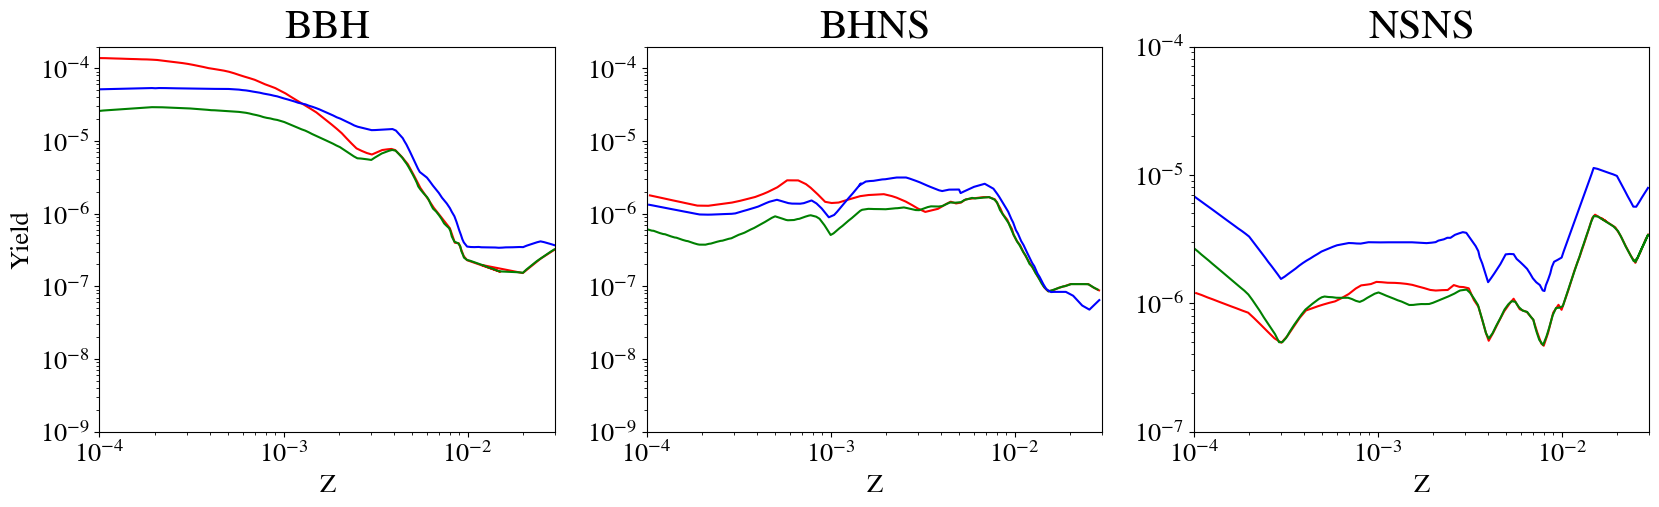

In [4]:
#####################
# Klencki et al. 2018

fig = plt.figure(figsize=(20, 5))

# Create a GridSpec with 1 row and 3 columns
gs = GridSpec(1, 3, figure=fig)

# Create 3 small subplots on a line
axes = [fig.add_subplot(gs[0, i]) for i in range(3)]

# List of panda tables of pot DCO progenitors
titles = ["BBH", "BHNS", "NSNS"]
Klencki2018 = extract_WebPlotDigitizer_data(loc = yield_data_dir+ '/2018_Klencki/', filename = 'Kleincki2018.json')

# Extract the different types of DCOs
BBHs    = Klencki2018[Klencki2018['name'].str.contains('_BBH')].reset_index(drop=True)
BHNSs   = Klencki2018[Klencki2018['name'].str.contains('_BHNS')].reset_index(drop=True)
NSNSs   = Klencki2018[Klencki2018['name'].str.contains('_NSNS')].reset_index(drop=True)
dfs = [BBHs, BHNSs, NSNSs]

# Loop over the axes and dataframes
for ax, df, title in zip(axes, dfs, titles):
    ax.plot(1,1)

    for i in range(df.shape[0]):
        ax.plot(df['x_value'][i], df['y_value'][i], label = df['name'][i], color = df['color'][i])

    ax.set_title(title)
    ax.set_xlim(0.0001,0.03)
    ax.set_xlabel('Z')
    ax.set_xscale('log')
    ax.set_yscale('log')
    
axes[0].set_ylabel('Yield')
axes[0].set_ylim(1e-9,2e-4)
axes[1].set_ylim(1e-9,2e-4)
axes[2].set_ylim(1e-7,1e-4)

plt.show()

### Neijssel + 2019

Code: COMPAS  

fig. 1 https://arxiv.org/abs/1906.08136

Zsun = 0.0142

Zsun * 10**xvals = x


(-2.129306745182013, -2.094740364025696, -2.060173982869379, -2.0256076017130624, -1.9910412205567454, -1.9564748394004283, -1.9219084582441115, -1.8873420770877947, -1.8527756959314776, -1.8182093147751606, -1.783642933618844, -1.749076552462527, -1.7145101713062099, -1.679943790149893, -1.6453774089935762, -1.6108110278372592, -1.5762446466809423, -1.5416782655246255, -1.5071118843683085, -1.4725455032119914, -1.4395503211991436, -1.4081263383297646, -1.3751311563169166, -1.3405647751605996, -1.3059983940042827, -1.2730032119914347, -1.2415792291220558, -1.2101552462526768, -1.1771600642398288, -1.142593683083512, -1.109598501070664, -1.0797457173447538, -1.0514641327623127, -1.0263249464668096, -1.0058993576017132, -0.9870449678800857, -0.9681905781584583, -0.947764989293362, -0.9241970021413277, -0.8990578158458244, -0.8739186295503214, -0.850350642398287, -0.8299250535331906, -0.8094994646680944, -0.789073875802998, -0.7670770877944326, -0.7419379014989294, -0.7167987152034263, -0

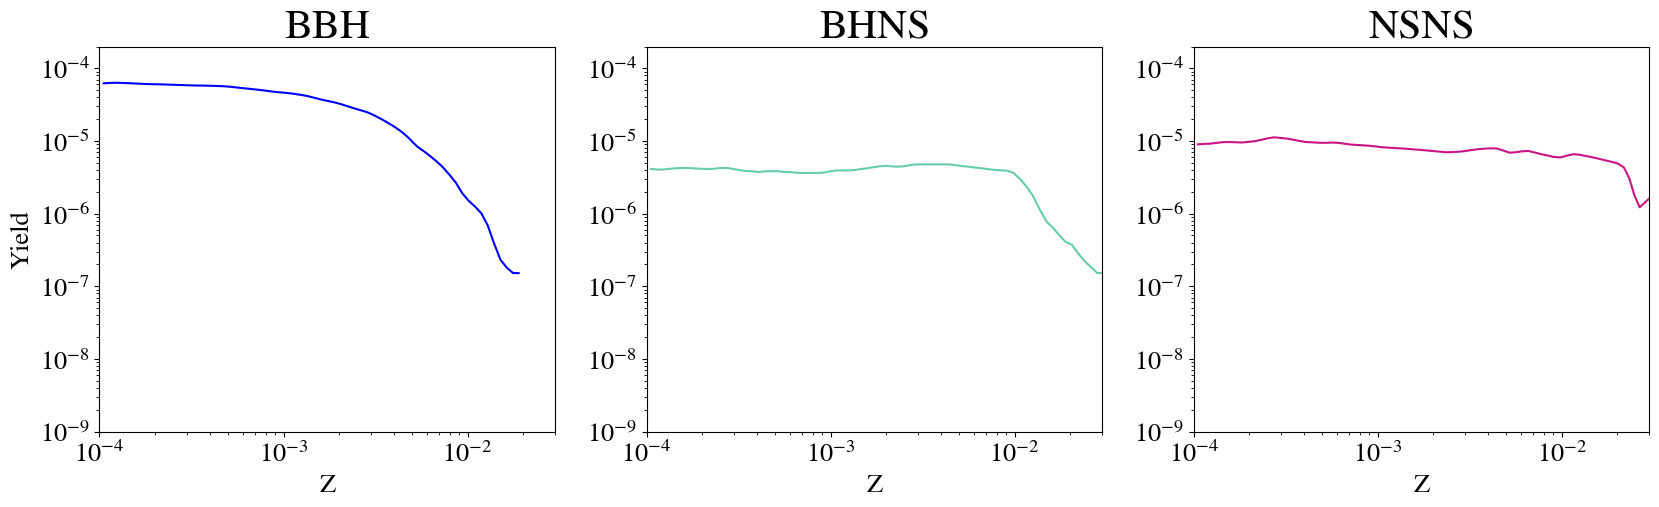

In [5]:
Zsun = 0.0142 

#####################
# Neijssel et al. 2019

fig = plt.figure(figsize=(20, 5))

# Create a GridSpec with 1 row and 3 columns
gs = GridSpec(1, 3, figure=fig)

# Create 3 small subplots on a line
axes = [fig.add_subplot(gs[0, i]) for i in range(3)]

# List of panda tables of pot DCO progenitors
titles = ["BBH", "BHNS", "NSNS"]
Neijssel2019 = extract_WebPlotDigitizer_data(loc = yield_data_dir+ '/2019_Neijssel/', filename = 'Neijssel2019.json')

# Extract the different types of DCOs
BBHs    = Neijssel2019[Neijssel2019['name'].str.contains('_BBH')].reset_index(drop=True)
BHNSs   = Neijssel2019[Neijssel2019['name'].str.contains('_BHNS')].reset_index(drop=True)
NSNSs   = Neijssel2019[Neijssel2019['name'].str.contains('_NSNS')].reset_index(drop=True)

print(BBHs['x_value'][0])

dfs = [BBHs, BHNSs, NSNSs]

# Loop over the axes and dataframes
for ax, df, title in zip(axes, dfs, titles):
    ax.plot(1,1)

    for i in range(df.shape[0]):
        xvals = np.array([ x for x in df['x_value'][i]])
        yvals = np.array([ y for y in df['y_value'][i]])
        ax.plot(Zsun * 10**xvals, 10**-5 * yvals, label = df['name'][i], color = df['color'][i])

    ax.set_title(title)
    ax.set_xlabel('Z')
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(0.0001,0.03)
    ax.set_ylim(1e-9,2e-4)

axes[0].set_ylabel('Yield')


plt.show()

### Santoliquido 2021 

populations from MOBSE

[Fig.1 from their paper](https://arxiv.org/abs/2009.03911)

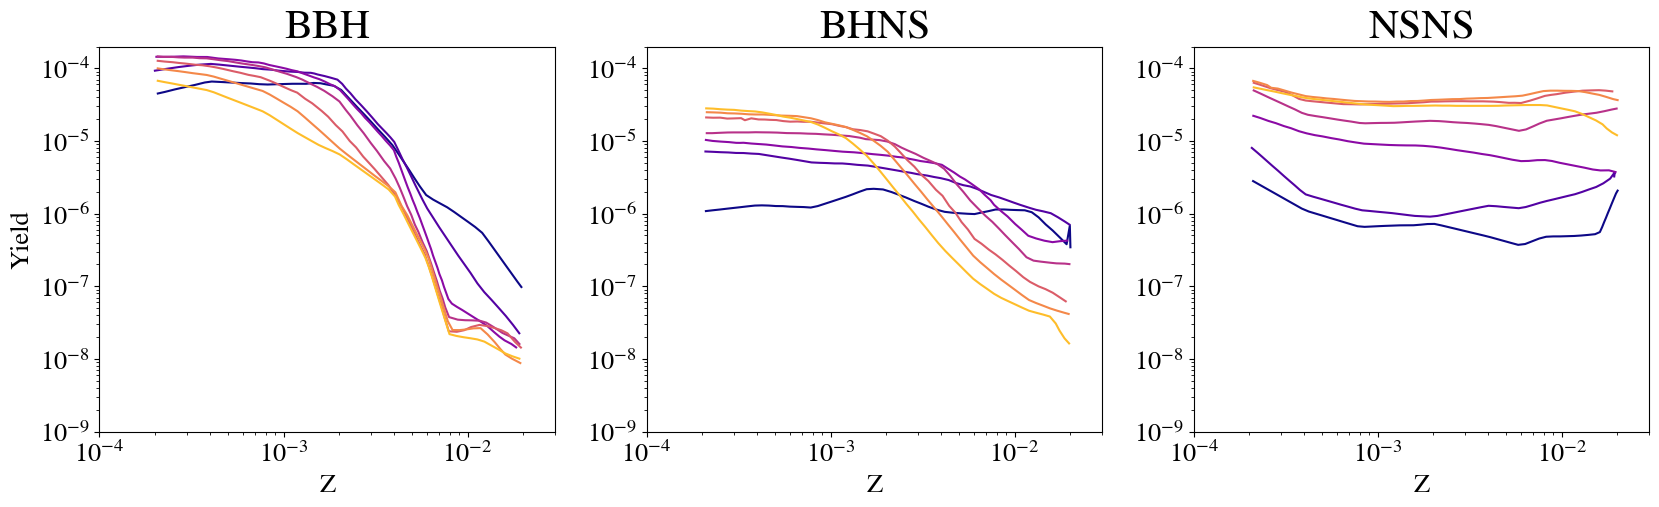

In [6]:

#####################
# Santoliquido 2020

fig = plt.figure(figsize=(20, 5))

# Create a GridSpec with 1 row and 3 columns
gs = GridSpec(1, 3, figure=fig)

# Create 3 small subplots on a line
axes = [fig.add_subplot(gs[0, i]) for i in range(3)]

# List of panda tables of pot DCO progenitors
titles = ["BBH", "BHNS", "NSNS"]
Santoliquido2020 = extract_WebPlotDigitizer_data(loc = yield_data_dir+ '/2020_Santoliquido/', filename = 'Santoliquido2020.json')

# Extract the different types of DCOs
BBHs    = Santoliquido2020[Santoliquido2020['name'].str.contains('_BBH')].reset_index(drop=True)
BHNSs   = Santoliquido2020[Santoliquido2020['name'].str.contains('_BHNS')].reset_index(drop=True)
NSNSs   = Santoliquido2020[Santoliquido2020['name'].str.contains('_NSNS')].reset_index(drop=True)

dfs = [BBHs, BHNSs, NSNSs]

# Loop over the axes and dataframes
for ax, df, title in zip(axes, dfs, titles):
    ax.plot(1,1)

    for i in range(df.shape[0]):
        ax.plot(df['x_value'][i], df['y_value'][i], label = df['name'][i], color = df['color'][i])

    ax.set_title(title)
    ax.set_xlabel('Z')
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(0.0001,0.03)
    ax.set_ylim(1e-9,2e-4)
    # ax.legend()

axes[0].set_ylabel('Yield')

plt.show()

### Broekgaarden + 2021

Was run Using COMPAS, paper is [here](https://arxiv.org/abs/2112.05763)

Floor made everything publically available :), [See her Github here](https://github.com/FloorBroekgaarden/Double-Compact-Object-Mergers/blob/main/plottingCode/Fig_1_and_Fig_A1/make_Fig_1_and_Fig_A1.ipynb)

and the data is the ```csvFilesForFigure1_DCOpaper.zip``` downloaded from [here](https://zenodo.org/records/5178777)

changed 3
now at DCO type   BBH
now at DCO type   BHNS
now at DCO type   BNS


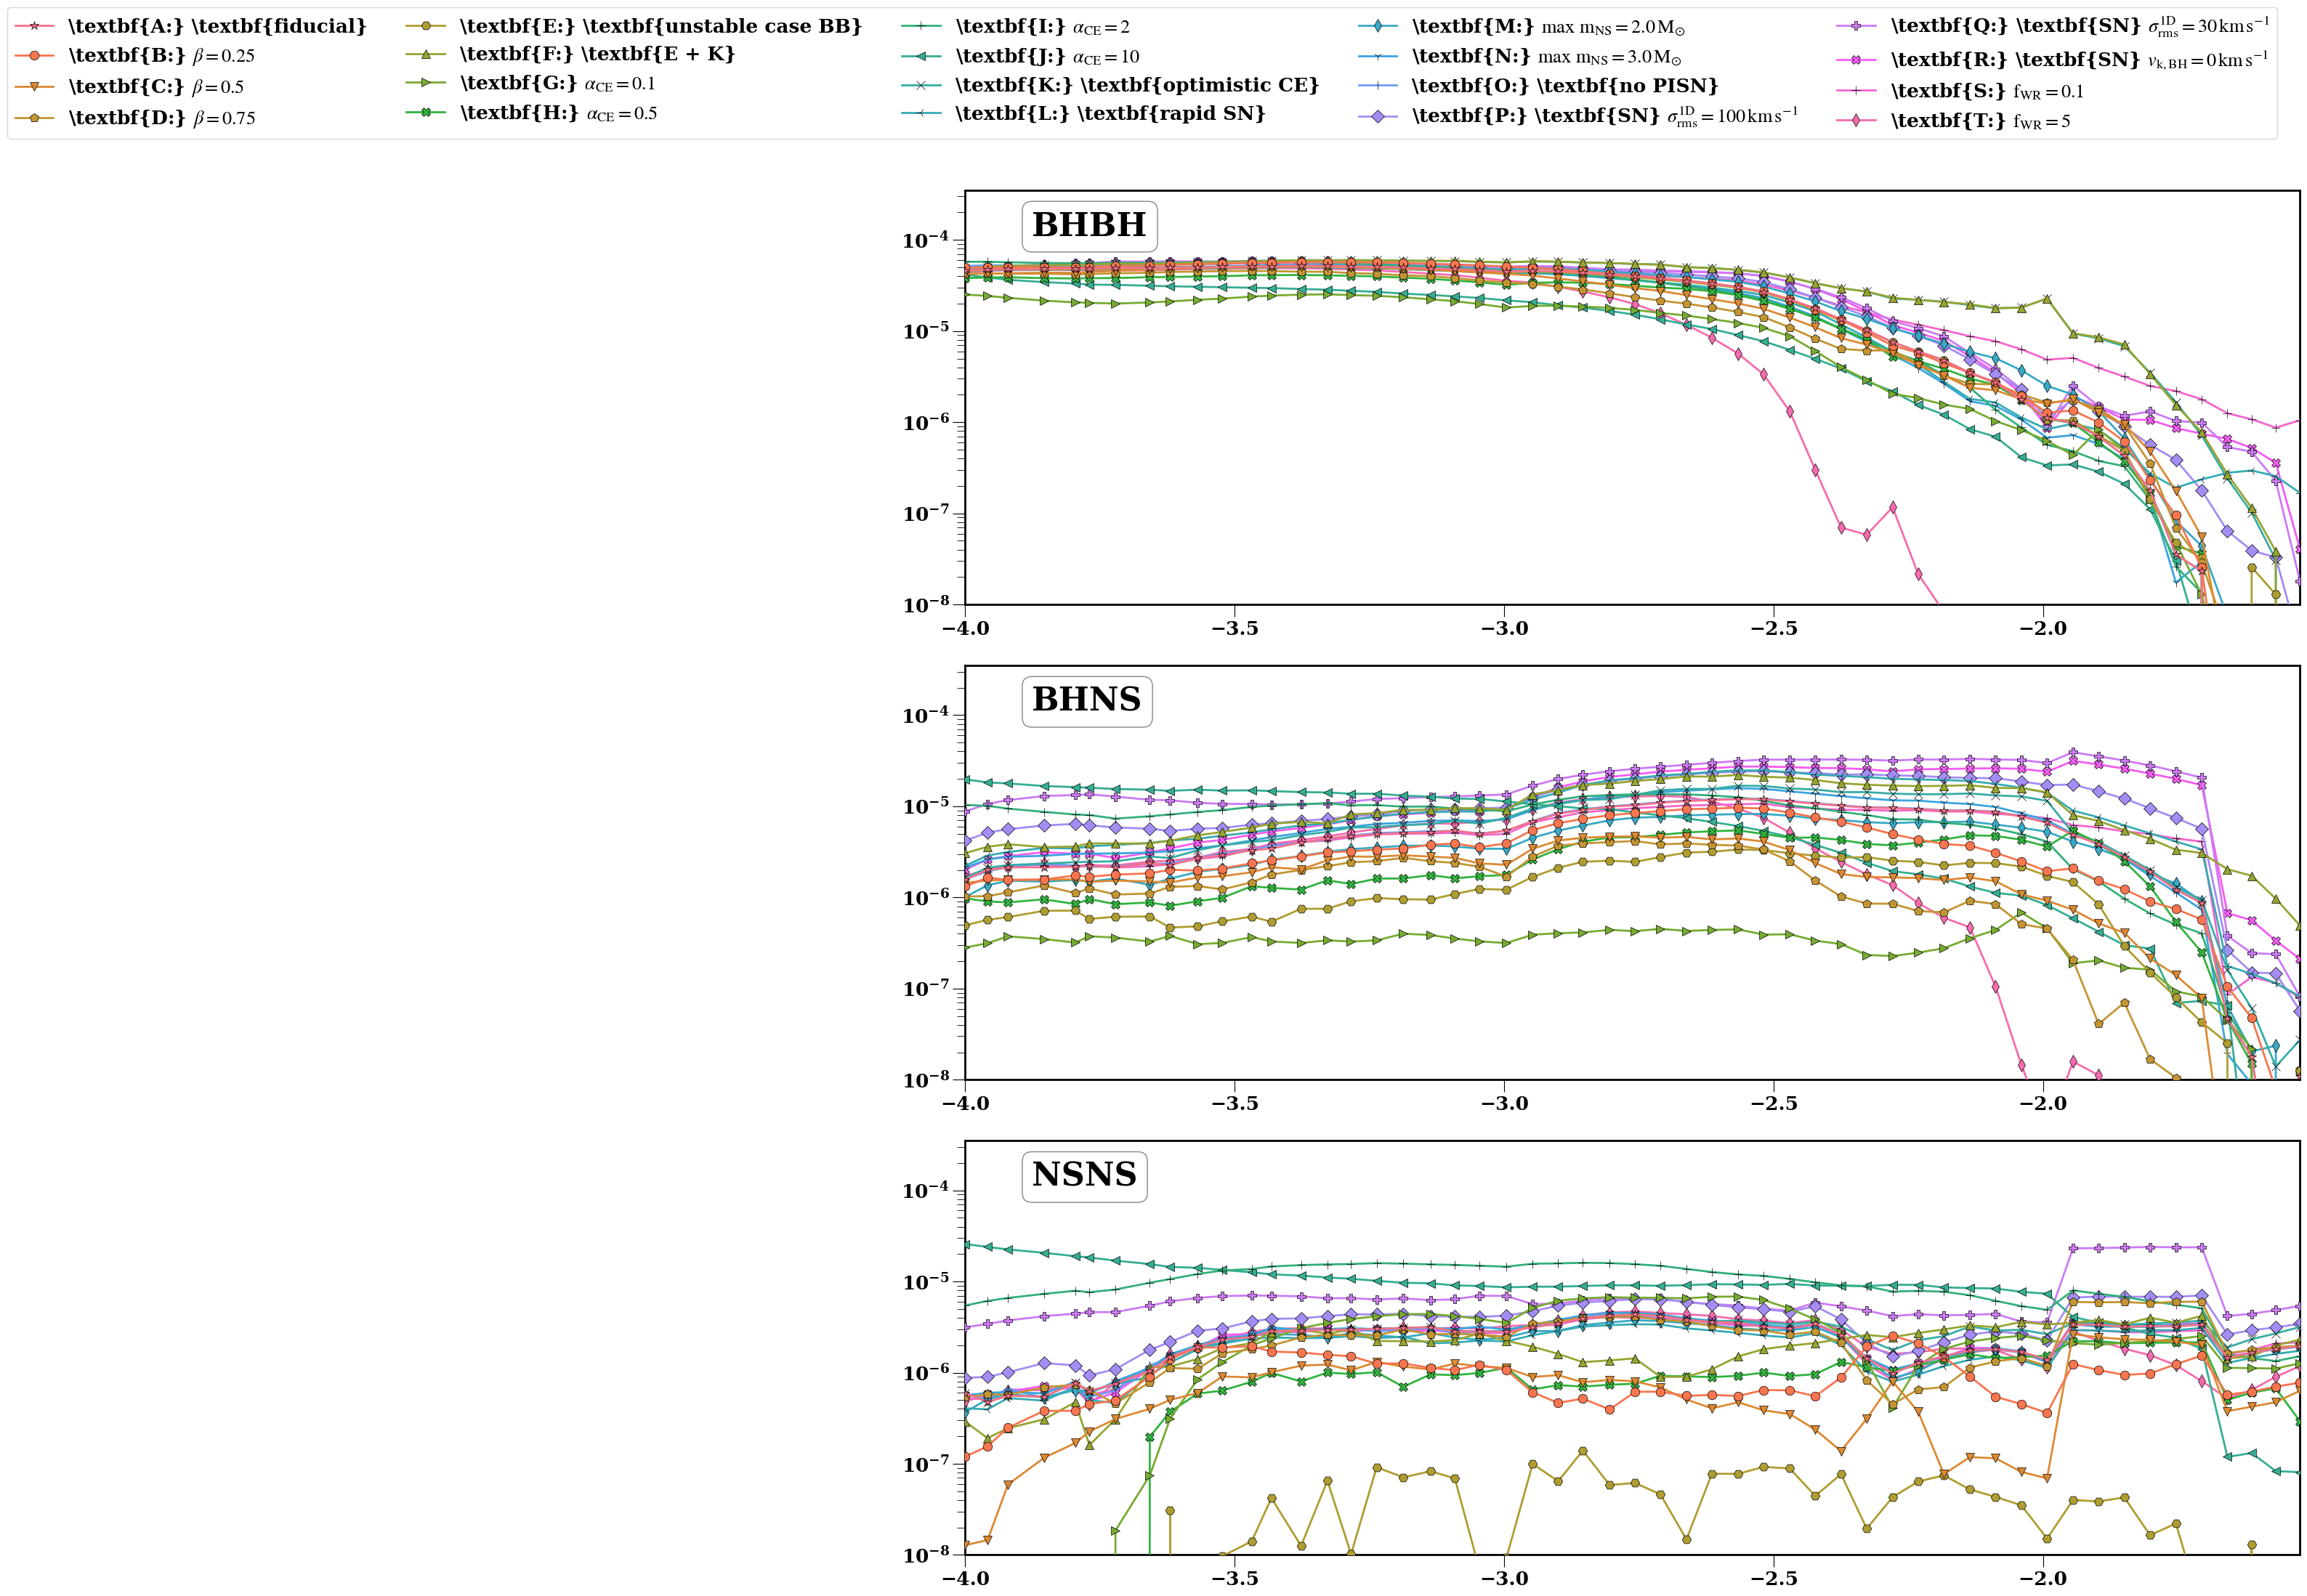

In [7]:
# This script contains some variables used in the function below
sys.path.append(yield_data_dir+ '/2021_Broekgaarden/')
from PostProcessingScripts import * 

plt.rcParams['text.usetex'] = False


def Reverse(lst): 
    return [ele for ele in reversed(lst)]


def plotFormationRatePerZ(pathCSVfile='../dataFiles/summary_data_Fig_1/'):#, alphabetDirDict=alphabetDirDict):
    """ plots the formation yield of BHBH, BHNS and NSNS as a function of metallicity
    it uses as input the formationRatesTotalAndPerChannel datafiles (see Zenodo for files) that 
    should be located in the user-specified directory pathCSVfile 
    alphabetDirDict are the names of the simulated data that one wants to plot, 
    """
    
    ncols, nrows = 1, 3  # set figure size and properties
    f, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20,20), 
                  gridspec_kw={"width_ratios":1*np.ones(ncols), "height_ratios":1*np.ones(nrows)})  

    ## CONSTANTS AND other things 
    Types      = ['BBH', 'BHNS',  'BNS']
    dictDCOtypeDCOlabel = {'BBH':'BHBH', 'BNS':'NSNS', 'BHNS':'BHNS', 'NSBH':'NSBH'}
    
    # different marker shape types used 
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
    zorderlist = Reverse(range(nModels+3)) # the zorder for the models
    
    # solar metallicity used to aid the reader 
    solar = 0.0142

    # define metallicity array (these are the metallicities of the simulations)
    metallicities=[0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
           0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
           0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
           0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
           0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
           0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
           0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
           0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03]
    log10metallicities= np.log10(np.asarray(metallicities))
    
    lw, ms=2, 9 # line width and marker size for plots 
    y_top=35/1E5  # max Y value to plot 
    
    # axes labels
    # nameX = r'$\log_{10}(Z)$'
    # nameY = r'$\mathcal{R}_{\rm{form}}  \ \  [\rm{M}_{\odot}^{-1}]\   $'

    # iterate over the different DCO types (BHBH, BHNS and NSNS)
    for ind_t, DCOtype in enumerate(Types):
        axe = ax[ind_t] # plot each DCOtype on a new subplot 
        print('now at DCO type  ', DCOtype)
            
        DCOname = dictDCOtypeDCOlabel[DCOtype] # label name for DCO type 
        df = pd.read_csv(pathCSVfile + 'formationRatesTotalAndPerChannel_'+DCOname+ '_' +  '.csv', index_col=0) # read in data 
        
        for ind_m, bps_model in enumerate(BPSnameslist):
            
            # label for legend
            if ind_t==0:
                labelname=r'\textbf{%s:} '%bps_model  + alphabetPhysicalNameDict[bps_model] 
            else: 
                labelname=None
            
            
            # key name of the headers in the datafile, we want the 'total' yield that is given in units of Msun for each model
            # the dataframe gives the yield as a list of metallicities 
            key_ =  bps_model + ' ' + 'total'+ '  [Msun^{-1}]'
            upperY = np.asarray(df[key_]) # formation yield per metallicity for this channel 
            

             
            axe.plot(log10metallicities, upperY, color=BPScolors[ind_m], \
                      lw=lw, alpha=1, marker=markershapes[ind_m], markersize=ms,markeredgecolor='k',mew=0.5,\
                            linestyle='-', zorder=zorderlist[ind_m], label=labelname)
            
            
            # add facecolor to indicate regions above and below fiducial (model index 0) formation yields
            # if ind_m==0:
            #     axe.fill_between(log10metallicities, (1E-3/1E5)*np.ones_like(upperY), upperY, color='gray', alpha=0.1)
            #     axe.fill_between(log10metallicities,  upperY, (100)*np.ones_like(upperY)/1E5,color='gray', alpha=0.4)     

        
        if ind_t ==0:  
            # get legend labels
            handles, labels = axe.get_legend_handles_labels()
            
  
        # text_list = [r'$Z=Z_{\odot}$', r'$Z=Z_{\odot}/2$', \
        #              r'$Z=Z_{\odot}/5$',  r'$Z=Z_{\odot}/10$',\
        #              r'$Z=0.001$', r'$Z=0.0105$']    
        # for zz_ind, zz in enumerate([np.log10(solar), \
        #                              np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.001),\
        #                              np.log10(0.0105)]) :
        #     axe.plot([zz,zz], [0,y_top+1/1E5], \
        #                      c='k',\
        #                      lw=1.2, alpha=1, linestyle=':', zorder=100)  
            
        #     # add metallicity values as text to metallicity lines
        #     if ind_t==0:
        #         axe.text(zz-0.038, 1.2*0.001/1E5, s=text_list[zz_ind], fontsize=fs, rotation=90, verticalalignment='bottom')
        #     else:
        #         axe.text(zz-0.038, y_top-0.5/1E5, s=text_list[zz_ind], fontsize=fs-3, rotation=90, verticalalignment='top')
        
        
        # set axes name  
        # axe = layoutAxes(axe, nameX=nameX, nameY=nameY)
    
        # set yscale and x and y limits 
        axe.set_yscale('log')
        axe.set_xlim(min(log10metallicities), max(log10metallicities))
        axe.set_ylim(bottom=0.001/1E5,top=y_top)

            
        # add box with label to indicate which DCO type we are plotting in the top left of each panel   
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
        axe.annotate(r'%s'%(DCOname), xy=(0.05, .95), xycoords='axes fraction', fontsize = fs+8, weight = 'bold', ha='left', va="top",bbox=bbox_props)
        
        # # add a label for the gray areas in the background 
        # if ind_t in [1,2]:
        #     axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .79), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
        # if ind_t in [0,1]:
        #     axe.annotate(r'$\mathcal{R}_{\rm{form}} < \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.03, .1),  xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")
        #     if ind_t==0:
        #         axe.annotate(r'$\mathcal{R}_{\rm{form}} > \mathcal{R}_{\rm{form}}^{\rm{A:fiducial}} $', xy=(0.82, .95), xycoords='axes fraction', fontsize = fs+2, weight = 'bold', ha='left', va="top")


    # add legend, 
    plt.tight_layout()
    lgd2=plt.legend(handles, labels , fontsize=19, ncol=5,\
         bbox_to_anchor=(0.99, 3.76)) #,  markerscale=3., scatterpoints=1)
    
    
    # save as png and pdf, 
    plt.savefig(yield_data_dir+ '/2021_Broekgaarden/'+'/FormationRateAllModels3panels_vertical.png', bbox_extra_artists=(lgd2,), bbox_inches='tight', dpi = 600)
    plt.savefig(yield_data_dir+ '/2021_Broekgaarden/'+'/FormationRateAllModels3panels_vertical.pdf', bbox_extra_artists=(lgd2,), bbox_inches='tight')
    plt.show()
    plt.close() 

    

# plot Figure for Formation yield of DCO mergers as a function of metallicity    
plotFormationRatePerZ(pathCSVfile=yield_data_dir+ '/2021_Broekgaarden/')    
    
    


In [8]:
# From Broekgaarden et al. 2021
metallicities= np.array([0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
        0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
        0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
        0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
        0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
        0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
        0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
        0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03])

# Create a new DataFrame
Broekgaarden2021 = pd.DataFrame()

DCO_flavors = ["BBH", "BHNS", "NSNS"]                
for DCOname in DCO_flavors:
    # read in data
    if DCOname == 'BBH':
        flavor = 'BHBH'
    else:
        flavor = DCOname        
    Broekgaarden_df = pd.read_csv(yield_data_dir+ '/2021_Broekgaarden/' + 'formationRatesTotalAndPerChannel_'+flavor+ '_' +  '.csv', index_col=0) # read in data 

    # Select only the 'total' yields from the df
    keys_of_interest = [key for key in Broekgaarden_df.keys() if 'total' in key]
    filtered_df = Broekgaarden_df[keys_of_interest]

    # Create a temporary DataFrame
    temp_df = pd.DataFrame()
    temp_df['name'] = [key + f'_{DCOname}' for key in keys_of_interest]
    temp_df['color'] = [color for color in BPScolors] # comes from PostProcessingScripts
    temp_df['x_value'] = [pd.Series(metallicities) for _ in keys_of_interest]
    temp_df['y_value'] = [filtered_df[key] for key in keys_of_interest]

    # Append the temporary DataFrame to Broekgaarden2021
    Broekgaarden2021 = pd.concat([Broekgaarden2021, temp_df], ignore_index=True)

# display(Broekgaarden2021)

# display(Giacobbo_Mapelli2018)

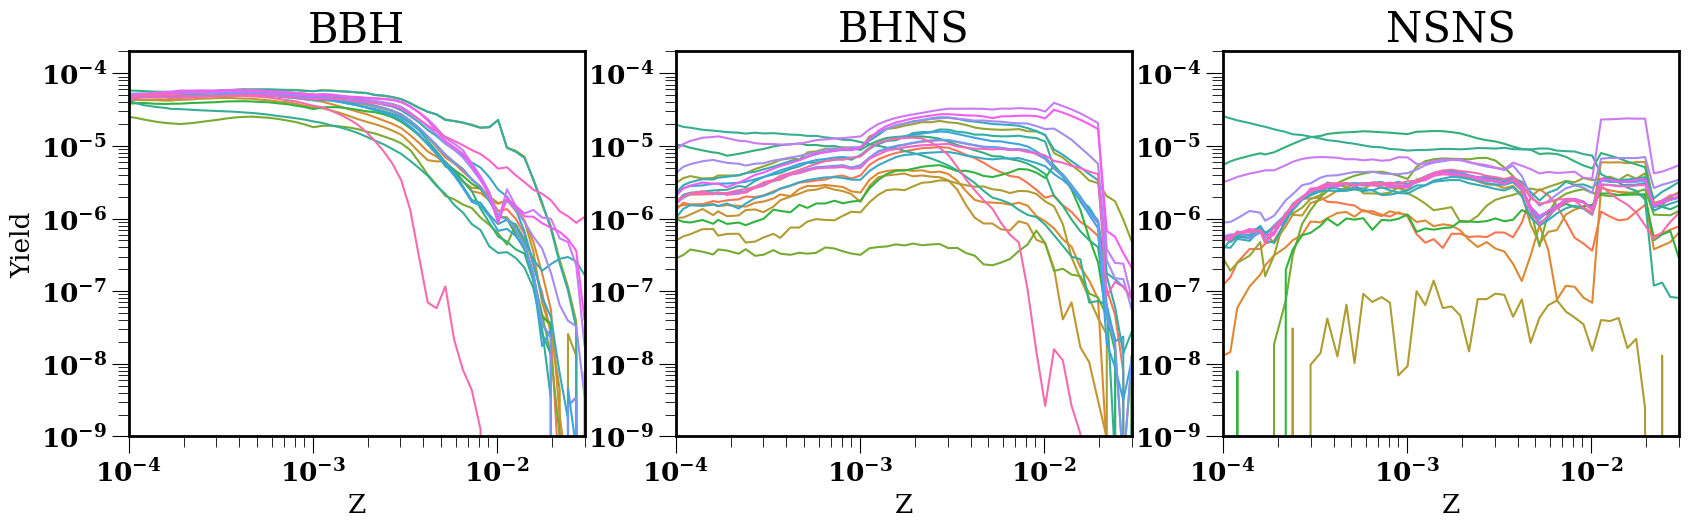

In [9]:

#####################
# Broekgaarden 2020

fig = plt.figure(figsize=(20, 5))

# Create a GridSpec with 1 row and 3 columns
gs = GridSpec(1, 3, figure=fig)

# Create 3 small subplots on a line
axes = [fig.add_subplot(gs[0, i]) for i in range(3)]

# List of panda tables of pot DCO progenitors
titles = ["BBH", "BHNS", "NSNS"]

# Extract the different types of DCOs
BBHs    = Broekgaarden2021[Broekgaarden2021['name'].str.contains('_BBH')].reset_index(drop=True)
BHNSs   = Broekgaarden2021[Broekgaarden2021['name'].str.contains('_BHNS')].reset_index(drop=True)
NSNSs   = Broekgaarden2021[Broekgaarden2021['name'].str.contains('_NSNS')].reset_index(drop=True)

dfs = [BBHs, BHNSs, NSNSs]

# Loop over the axes and dataframes
for ax, df, title in zip(axes, dfs, titles):
    ax.plot(1,1)

    for i in range(df.shape[0]):
        ax.plot(df['x_value'][i], df['y_value'][i], label = df['name'][i], color = df['color'][i])

    ax.set_title(title)
    ax.set_xlabel('Z')
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(0.0001,0.03)
    ax.set_ylim(1e-9,2e-4)
    # ax.legend()

axes[0].set_ylabel('Yield')

plt.show()

### Iorio + 2023 
Run with SEVN

Fig. 17/18 in [paper here](https://arxiv.org/abs/2211.11774)

Giuliano Iorio has also generously made their data available online!

The main git repo for this Figure is [here](https://gitlab.com/iogiul/iorio22_plot/-/tree/v3/merger_efficiency)
and the plot function [is here](https://gitlab.com/iogiul/iorio22_plot/-/blob/v3/merger_efficiency/PLot_paper.ipynb)


### unraveling data from Iorio

#### Location of data
yield_data_dir + '/2023_Iorio/iorio+22_Zenodo_repository_V2/data_from_simulations'

In this folder there are a bunch of subfolders, called e.g. "simulation_F", 
each of these folders contains a ``BHNSm.csv``, ``BHBHm.csv``, ``NSNSm.csv`` where the m presumably stands for merger


Ah there is also a file called ``summary.csv``, which has the metallicity for each row, and columns ``NSNSm``, ``BHBHm``, and ``BHNSm``, which presumably is the number of systems with Z  in the files above


There is also a file ``total_evolved_mass.txt``, in each folder, this contains just one number (Msun) needed to calculate the yield 

In [10]:
alpha_c={5:"sandybrown", 3:"palevioletred", 1:"blueviolet", 0.5:"darkblue"}
DCO_flavors = ["BBH", "BHNS", "NSNS"]                

# Choices made in Iorio 23 
fIMF=0.255 # the fraction of the IMF that was sampled
fbin=0.5   # the binary fraction

# Create a new DataFrame
Iorio2023 = pd.DataFrame()

Iorio_model_dir = yield_data_dir + '/2023_Iorio/iorio+22_Zenodo_repository_V2/data_from_simulations'

# For each folder in the model_dir
for mi, model in enumerate(os.listdir(Iorio_model_dir)):
    if model in ['.DS_Store', 'README.md']:
        continue
    # print(model)
    model_path = Iorio_model_dir + '/' + model

    # Read the summary file
    summary_data = pd.read_csv(model_path + '/summary.csv')

    # And the total mass evolved per simulation
    total_evolved_mass = float(open(model_path + '/total_evolved_mass.txt').readline())
    # print('total_evolved_mass', total_evolved_mass)
    
    # Loop over the 4 alpha variations (currently vstacked in file)
    for ai, alpha in enumerate(np.unique(summary_data['alpha'])):
        sub_summary_data = summary_data[summary_data['alpha'] == alpha]
        metallicities = sub_summary_data['Z']
        # print('metallicities', metallicities)

        # Loop over the DCO flavors
        for DCOname, NDCO in zip(DCO_flavors, [sub_summary_data['BHBHm'], sub_summary_data['BHNSm'], sub_summary_data['NSNSm']]):
            yield_data = NDCO * (fIMF*fbin/total_evolved_mass)

            # Create a single-row per model_alpha_DCOname
            temp_df = pd.DataFrame({
                'name': [model.replace('simulation_', '') + f'_{alpha}' + f'_{DCOname}'],
                'color': [alpha_c[alpha]],
                'x_value': [metallicities.values.tolist()],
                'y_value': [yield_data.values.tolist()]
            })

            # Append this row to Iorio2023
            Iorio2023 = pd.concat([Iorio2023, temp_df], ignore_index=True)

# display(Iorio2023)

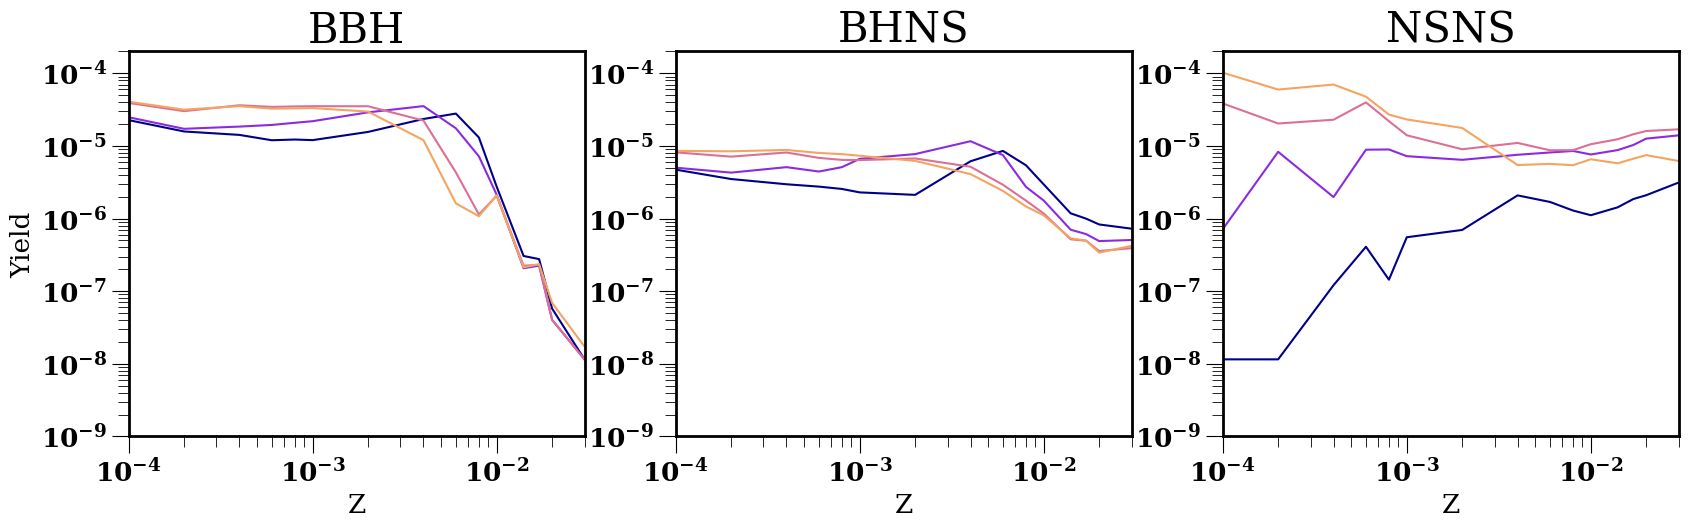

In [11]:
#####################
# Iorio 2023

fig = plt.figure(figsize=(20, 5))

# Create a GridSpec with 1 row and 3 columns
gs = GridSpec(1, 3, figure=fig)

# Create 3 small subplots on a line
axes = [fig.add_subplot(gs[0, i]) for i in range(3)]

# List of panda tables of pot DCO progenitors
titles = ["BBH", "BHNS", "NSNS"]

# Lets look only at the fiducial ()
sub_table = Iorio2023[Iorio2023['name'].str.startswith('F_')]

# Extract the different types of DCOs (to compare to Fig. 17)
BBHs    = sub_table[sub_table['name'].str.contains('_BBH')].reset_index(drop=True)
BHNSs   = sub_table[sub_table['name'].str.contains('_BHNS')].reset_index(drop=True)
NSNSs   = sub_table[sub_table['name'].str.contains('_NSNS')].reset_index(drop=True)

dfs = [BBHs, BHNSs, NSNSs]

# Loop over the axes and dataframes
for ax, df, title in zip(axes, dfs, titles):
    ax.plot(1,1)

    for i in range(df.shape[0]):
        ax.plot(df['x_value'][i], df['y_value'][i], label = df['name'][i], color = df['color'][i])

    ax.set_title(title)
    ax.set_xlabel('Z')
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(0.0001,0.03)
    ax.set_ylim(1e-9,2e-4)
    # ax.legend()

axes[0].set_ylabel('Yield')

plt.show()

# Now combine all data into one review plot


#### First collect the data into one df

In [12]:
Giacobbo_Mapelli2018 = extract_WebPlotDigitizer_data(loc = yield_data_dir+ '/2018_Giacobbo_Mapelli/', filename = 'Giacobbo_Mapelli2018.json')
Klencki2018          = extract_WebPlotDigitizer_data(loc = yield_data_dir+ '/2018_Klencki/', filename = 'Kleincki2018.json')
Neijssel2019         = extract_WebPlotDigitizer_data(loc = yield_data_dir+ '/2019_Neijssel/', filename = 'Neijssel2019.json')
Santoliquido2020     = extract_WebPlotDigitizer_data(loc = yield_data_dir+ '/2020_Santoliquido/', filename = 'Santoliquido2020.json')


citations   = ['Giacobbo $\&$ Mapelli 2018', 'Klencki 2018', 'Neijssel 2019', 'Santoliquido 2020','Broekgaarden 2021', 'Iorio 2023']
DCO_flavors = ["BBH", "BHNS", "NSNS"]                

# Create an empty DataFrame for each DCO flavor
BBH_df = pd.DataFrame(columns=['citation', 'var_name', 'xvals', 'yvals'])
BHNS_df = pd.DataFrame(columns=['citation', 'var_name', 'xvals', 'yvals'])
NSNS_df = pd.DataFrame(columns=['citation', 'var_name', 'xvals', 'yvals'])

flavor_dfs = {'BBH': BBH_df, 'BHNS': BHNS_df, 'NSNS': NSNS_df}

for flavor in DCO_flavors:
    # print('working on flavor', flavor)

    for ci, source_data in enumerate([Giacobbo_Mapelli2018, Klencki2018, Neijssel2019, Santoliquido2020, Broekgaarden2021, Iorio2023]):
        # print('working on citation', citations[ci])

        # Extract the different types of DCOs
        DCO_df = source_data[source_data['name'].str.contains(f'_{flavor}')].reset_index(drop=True)

        # For every physics variation that this work inspected 
        for i in range(DCO_df.shape[0]):
            xvals = pd.Series(DCO_df['x_value'][i])
            yvals = pd.Series(DCO_df['y_value'][i])

            if citations[ci] == 'Neijssel 2019':
                xvals = Zsun * 10**xvals
                yvals =  10**-5 *yvals
                
            # Append to the corresponding DataFrame
            # df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
            new_row = pd.DataFrame({'citation': [citations[ci]],'var_name': [DCO_df['name'][i]],'xvals': [xvals],'yvals': [yvals]})
            flavor_dfs[flavor] = pd.concat([flavor_dfs[flavor],  new_row], ignore_index=True)




### Calculate the medians
(a bit convolved because all the lists are different len)

In [13]:
percentiles = {'BBH': {}, 'BHNS': {}, 'NSNS': {}}

for flavor in percentiles.keys():
    # Flatten the 'xvals' and 'yvals'
    flat_xvals = np.array([item for sublist in flavor_dfs[flavor]['xvals'] for item in sublist])
    flat_yvals = np.array([item for sublist in flavor_dfs[flavor]['yvals'] for item in sublist])

    # Get the sorted indices of x
    sorted_indices = np.argsort(flat_xvals)

    # Use the sorted indices to sort x and y
    x_sorted = flat_xvals[sorted_indices]
    y_sorted = flat_yvals[sorted_indices]

    # Define the bins
    bins = np.logspace(-4, np.log10(0.03), 10)

    percentiles[flavor]['center_bins'] = bins[:-1] + np.diff(bins) / 2

    # Use numpy.digitize to get the bin indices for each x value
    bin_indices = np.digitize(x_sorted, bins)

    # Now you can use bin_indices to group y_sorted values
    y_binned = [y_sorted[bin_indices == i] for i in range(1, len(bins))]

    # Calculate the percentiles for each bin
    p10, Median, p90 = [], [], []
    for y_bin in y_binned:
        p10.append(np.percentile(y_bin, 10))
        Median.append(np.percentile(y_bin, 50))
        p90.append(np.percentile(y_bin, 90))

    # Store the percentiles in the dictionary
    percentiles[flavor]['p10'] = p10
    percentiles[flavor]['Median'] = Median
    percentiles[flavor]['p90'] = p90


#### Now plot it

/mnt/sw/nix/store/b4q5asj8flwlgmaijgj1r6wbmnls5x8k-python-3.9.15-view/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_407756/1490732672.py:39: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.log10(percentiles[flavor]['center_bins']/0.014), np.log10(percentiles[flavor]['p10']), color = color_dict[flavor], ls = '--', lw = 3)
/tmp/ipykernel_407756/1490732672.py:41: RuntimeWarning: divide by zero encountered in log10
  ax.fill_between(np.log10(percentiles[flavor]['center_bins']/0.014), np.log10(percentiles[flavor]['p10']), np.log10(percentiles[flavor]['p90']), color = color_dict[flavor], alpha = 0.1)


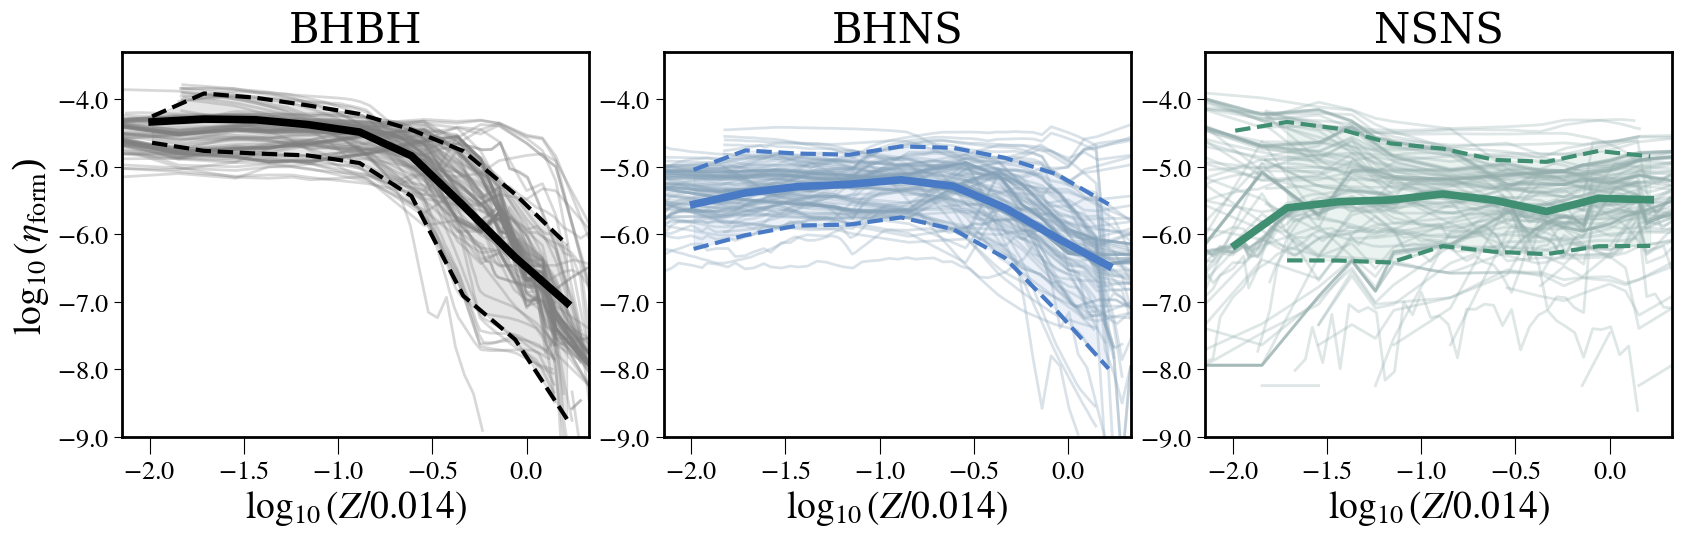

In [33]:
#####################
# Review plot
fig = plt.figure(figsize=(20, 5))

# Create a GridSpec with 1 row and 3 columns
gs = GridSpec(1, 3, figure=fig)

# Create 3 small subplots on a line
axes = [fig.add_subplot(gs[0, i]) for i in range(3)]


# Empty lists to compute 10,50 and 90 percentiles
all_BBH_y_values, all_BHNS_y_values, all_NSNS_y_values = {}, {}, {}

color_dict = {'BBH': 'black', 'BHNS': '#487AC5', 'NSNS': '#408F72'}
linecolor_dict = {'BBH': 'grey', 'BHNS': '#86A2B8', 'NSNS': '#94AEAD'}
# linecolor_dict = {'BBH': 'grey', 'BHNS': '#1678cc', 'NSNS': '#64b2d1'}


from matplotlib.ticker import FuncFormatter

# Define a function to format the tick labels
def format_tick(x, pos):
    return '$%0.1f$' % x
    # return r'$\mathdefault{%0.1f}$' % x

# Create a formatter
formatter = FuncFormatter(format_tick)


for ax, flavor in zip(axes, DCO_flavors):

    for v, var in enumerate(flavor_dfs[flavor]['var_name']):
        ax.plot(np.log10(flavor_dfs[flavor]['xvals'][v]/0.014), np.log10(flavor_dfs[flavor]['yvals'][v]), 
                 lw = 2, c = linecolor_dict[flavor], alpha = 0.3)#, label = flavor_dfs[flavor]['citation'][v])

    # Plot the median values
    ax.plot(np.log10(percentiles[flavor]['center_bins']/0.014), np.log10(percentiles[flavor]['Median']), color = color_dict[flavor], ls = '-', lw = 5.5)
    ax.plot(np.log10(percentiles[flavor]['center_bins']/0.014), np.log10(percentiles[flavor]['p10']), color = color_dict[flavor], ls = '--', lw = 3)
    ax.plot(np.log10(percentiles[flavor]['center_bins']/0.014), np.log10(percentiles[flavor]['p90']), color = color_dict[flavor], ls = '--', lw = 3)
    ax.fill_between(np.log10(percentiles[flavor]['center_bins']/0.014), np.log10(percentiles[flavor]['p10']), np.log10(percentiles[flavor]['p90']), color = color_dict[flavor], alpha = 0.1)

    # Plot values
    if flavor == 'BBH':
        ax.set_title('BHBH')
    else:
        ax.set_title(flavor)

    ax.set_xlim(np.log10(1e-4/0.014),np.log10(0.03/0.014))
    ax.set_xlabel('$\log_{10}(Z/0.014)$', fontsize = 27)


    # ax.set_xlim(0.0001,0.03)
    ax.set_ylim(-9,-3.3)

    # apply math font formatting to the ticks
    ax.xaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_formatter(formatter)
    ax.tick_params(axis='y', length=6) # change len of y-ticks

axes[0].set_ylabel('$\log_{10} (\eta_{\mathrm{form}}$) ', fontsize = 27) #  formation efficiency [M$_{\odot}^{-1}$]
fig.subplots_adjust(wspace=0.16)

plt.savefig(f'{home_dir}/ZdependentFormEff/plots/Review_yields.pdf', bbox_inches='tight')

plt.show()

## Review yield coloured by citation

0 Iorio 2023
1 Giacobbo  Mapelli 2018
2 Klencki 2018
3 Neijssel 2019
4 Santoliquido 2020
5 Broekgaarden 2021


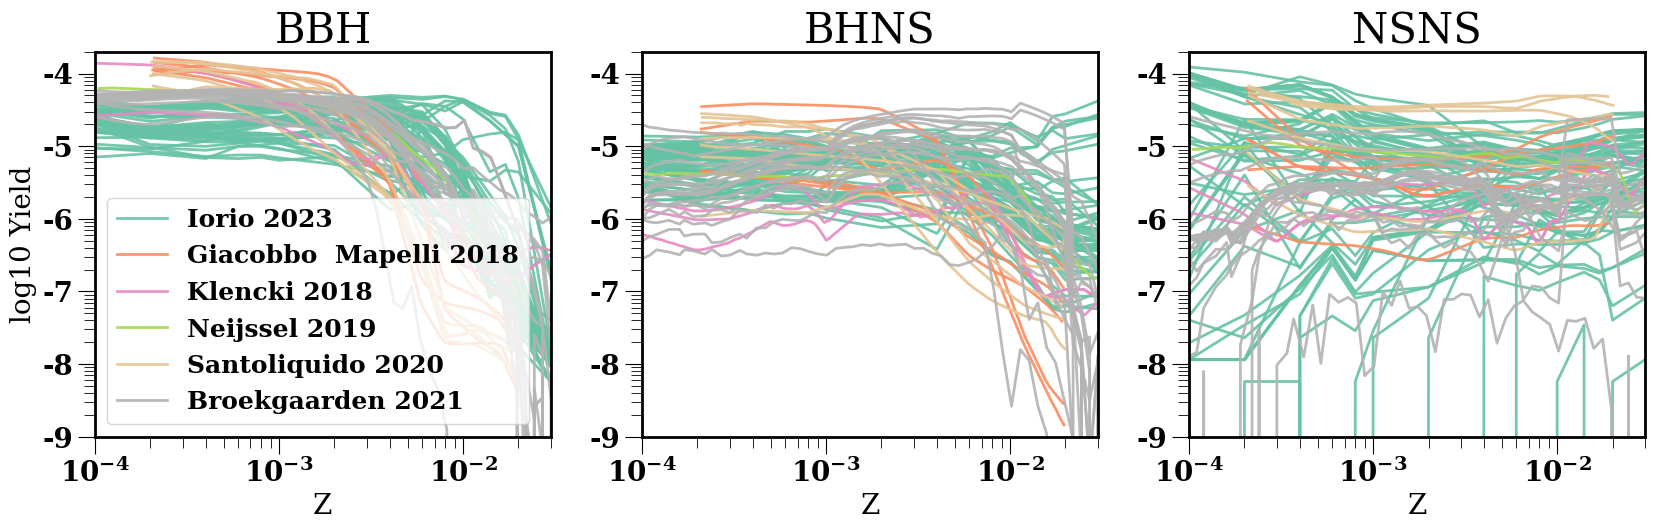

In [19]:
Giacobbo_Mapelli2018 = extract_WebPlotDigitizer_data(loc = yield_data_dir+ '/2018_Giacobbo_Mapelli/', filename = 'Giacobbo_Mapelli2018.json')
Klencki2018          = extract_WebPlotDigitizer_data(loc = yield_data_dir+ '/2018_Klencki/', filename = 'Kleincki2018.json')
Neijssel2019         = extract_WebPlotDigitizer_data(loc = yield_data_dir+ '/2019_Neijssel/', filename = 'Neijssel2019.json')
Santoliquido2020     = extract_WebPlotDigitizer_data(loc = yield_data_dir+ '/2020_Santoliquido/', filename = 'Santoliquido2020.json')

#####################
# Review plot
fig = plt.figure(figsize=(20, 5))

# Create a GridSpec with 1 row and 3 columns
gs = GridSpec(1, 3, figure=fig)

# Create 3 small subplots on a line
axes = [fig.add_subplot(gs[0, i]) for i in range(3)]

# List of panda tables of pot DCO progenitors
titles      = ["BBH", "BHNS", "NSNS"]
citations   = ['Iorio 2023', 'Giacobbo  Mapelli 2018', 'Klencki 2018', 'Neijssel 2019', 'Santoliquido 2020','Broekgaarden 2021']
cite_col    = plt.cm.Set2(np.linspace(0, 1, len(citations)))


for ci, source_data in enumerate([Iorio2023, Giacobbo_Mapelli2018, Klencki2018, Neijssel2019, Santoliquido2020, Broekgaarden2021, ]):
    print(ci, citations[ci])
    LABEL = citations[ci]
    
    # Extract the different types of DCOs
    BBHs    = source_data[source_data['name'].str.contains('_BBH')].reset_index(drop=True)
    BHNSs   = source_data[source_data['name'].str.contains('_BHNS')].reset_index(drop=True)
    NSNSs   = source_data[source_data['name'].str.contains('_NSNS')].reset_index(drop=True)
    dfs = [BBHs, BHNSs, NSNSs]

    # Loop over the axes and dataframes
    for ax, df in zip(axes, dfs):
        for i in range(df.shape[0]):
            xvals = np.array([ x for x in df['x_value'][i]])
            yvals = np.array([ y for y in df['y_value'][i]])

            if citations[ci] == 'Neijssel 2019':
                xvals = Zsun * 10**xvals
                yvals =  10**-5 *yvals

            ax.plot(xvals, yvals, label = LABEL, color = cite_col[ci], alpha = 0.9, lw =2)
            LABEL = None


for a, ax in enumerate(axes):
    ax.set_title(titles[a])
    ax.set_xlabel('Z')
    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(0.0001,0.03)
    ax.set_ylim(1e-9,2e-4)

    # change y tick labels
    ax.set_yticks(np.logspace(-9, -4, num=6))
    ax.set_yticklabels([-9, -8, -7, -6, -5, -4])

axes[0].set_ylabel('log10 Yield')
axes[0].legend(fontsize = 18)
# plt.savefig(f'{home_dir}/ZdependentFormEff/plots/Review_yields_col_by_cite.pdf', bbox_inches='tight')

plt.show()
